## Observable Trends
- Correlation between Number of Rides and Total Fare
- Urban City Types account for the greatest number of total fares, rides and drivers.
- Rural City Types account for the lowest number of total fares, rides and drivers.
- As ride sharing is based on convenience for the rider and the gig economy for drivers to earn money.  There needs to be a supply of drivers to meet rider demand = convience, especially in rural areas.  Question arises, is the share of rural rides/fares a result of low demand of riders or due to the lack of supply of drivers? We could perform additional analysis if we had the geo location (lat/long) of requested rides, average wait time and travel distance to address these questions. Currently there is opportunity to go after market share and create revenue growth in the suburban/rural areas. Overall, there is always opportunity to optimize ride sharing as long as it has not yet reached equilibrium. 


In [8]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

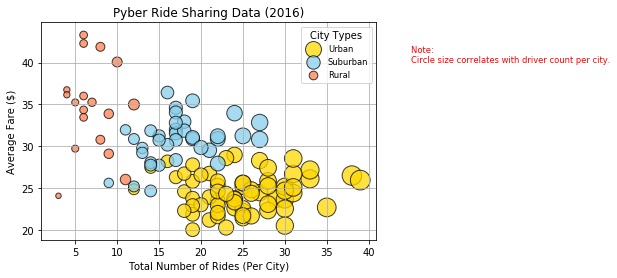

In [56]:
# Obtain the x and y coordinates for each of the three city types
city_type_urban = combined_df[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
city_type_suburban = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])
city_type_rural = combined_df[combined_df["type"] == "Rural"].groupby([combined_df["city"]])

# Calculation for Average Fare($) Per City
y_urban = city_type_urban["fare"].mean()
y_suburban = city_type_suburban["fare"].mean()
y_rural = city_type_rural["fare"].mean()

# Calculation for Total Number of Rides Per City
x_urban = city_type_urban["ride_id"].count()
x_suburban = city_type_suburban["ride_id"].count()
x_rural = city_type_rural["ride_id"].count()

# Calculation for Total Number of Drivers Per City
s_urban = city_type_urban["driver_count"].count()
s_suburban = city_type_suburban["driver_count"].count()
s_rural = city_type_rural["driver_count"].count()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, marker="o", color=["gold"], edgecolor="black", s=s_urban * 10, label = "Urban", alpha = 0.75, linewidth=1)
plt.scatter(x_suburban, y_suburban, marker="o", color=["skyblue"], edgecolor="black", s=s_suburban  * 10, label = "Suburban", alpha = 0.75, linewidth=1)
plt.scatter(x_rural, y_rural, marker="o", color=["coral"], edgecolor="black", s=s_rural * 10, label = "Rural", alpha = 0.75, linewidth=1)
plt.grid()

# Incorporate the other graph properties -- not sure what else?

# Create a legend
legend = plt.legend(loc="best", fontsize="small", title= "City Types", fancybox=True) 

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.text(45,40, "Note: \nCircle size correlates with driver count per city.", fontsize="small", color='red')

# Save Figure
plt.savefig("../Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

## Total Fares by City Type

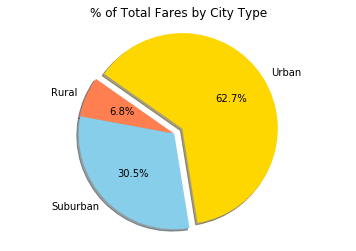

In [51]:
# Group Types
type_df = combined_df.groupby(["type"])

# Calculate Percent of Total Fares by City Type
fares_type = type_df["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(fares_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("..//Images/PercentofTotalFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

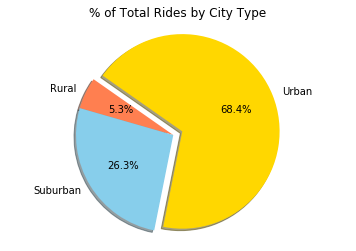

In [50]:
# Calculate Percent of Total Rides by City Type
rides_type = type_df["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(rides_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("..//Images/PercentofTotalRidesbyCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

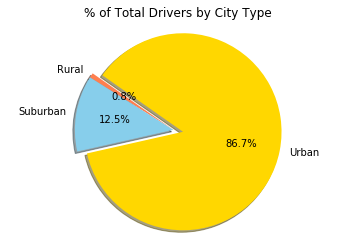

In [54]:
# Calculate Percent of Total Drivers by City Type
drivers_type = type_df["driver_count"].sum()

# Labels for the sections of our pie chart
labels = ["Rural","Suburban","Urban"]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(drivers_type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("..//Images/PercentofTotalDriversbyCityType.png")

# Show Figure
plt.show()